# IRIS Dataset

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems.
It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. 
The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). 
Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

# Problem Statement

# Importing libraries

In [105]:
import pandas as pd #For reading the dataset
import numpy as np #For ndarrays
import matplotlib.pyplot as plt #For plotting of histogram graphs
import seaborn as sns #For plotting violin graphs
from sklearn.linear_model import LogisticRegression #For performing logistic Regression on the dataset
from sklearn.model_selection import train_test_split #For splitting dataset for training a model
from sklearn.preprocessing import StandardScaler # For scaling the data
from sklearn.model_selection import cross_val_score # For scoring
from sklearn.neighbors import KNeighborsClassifier # For applying KNN classification algorithm
from sklearn.ensemble import RandomForestClassifier # For applying Random Forest algorithm

# Reading Iris dataset

In [5]:
# Reading iris dataset using pandas

data = pd.read_csv(r"C:/Users/Antrixsh/Desktop/Iris.csv", header = None)

#Note:- pd.read_csv is used because our file is in csv format, for xlx format we will use pd.read_excel

# Info about the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Describing the data

In [10]:
data.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Defining the labels

In [5]:
#Putting labels in the iris data if not given

data.columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Species']

In [6]:
#Again displaying data along with column name
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# head()

In [7]:
# head() function is used to display first 5 column of the data

data.head()

#Note:- we can also define the no. of column we want to display, eg: data.head(10) which will display First 10 columns

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# tail()

In [8]:
# tail() function is used to display last 5 column of the data

data.tail()

#Note:- we can also define the no. of column we want to display, eg: data.tail(10) which will display Last 10 columns

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Visualizing the data

Visualizations are the easiest way to analyze and absorb information. Visuals help to easily understand the complex problem. They help in identifying patterns, relationships, and outliers in data.

Here, we are using histogram to visualize our data

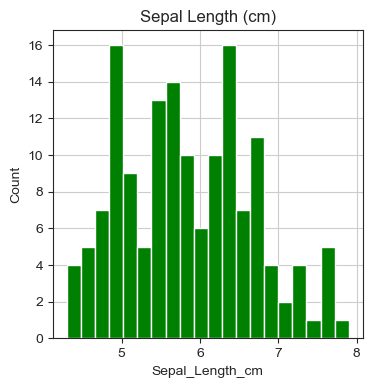

In [113]:
# Now to understand the data on the basis of columns, we plot(histogram) each column using matplotlib

#Defining the figure size
plt.figure(figsize = (4,4)) 

#Now taking 'Sepal Length' column and plotting a graph
x = data["Sepal Length"] 
plt.hist(x, bins = 20, color = "green") 

#Defining the title and labels of the graph
plt.title("Sepal Length (cm)") 
plt.xlabel("Sepal_Length_cm") 
plt.ylabel("Count") 

#To show grid in the graph
plt.grid()

#For displaying the graph
plt.show()

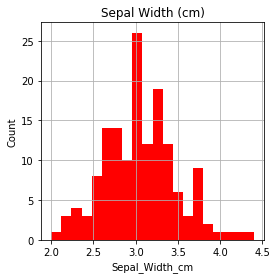

In [10]:
#Plotting graph using 'Sepal Width' column similar to previous one

plt.figure(figsize = (4,4)) 
x = data["Sepal Width"]
  
plt.hist(x, bins = 20, color = "red") 
plt.title("Sepal Width (cm)") 
plt.xlabel("Sepal_Width_cm") 
plt.ylabel("Count") 
plt.grid()
plt.show() 

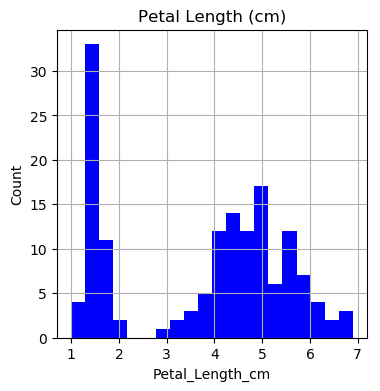

In [69]:
#Plotting graph using 'Petal Length' column
plt.figure(figsize = (4,4)) 
x = data['Petal Length'] 
  
plt.hist(x, bins = 20, color = "blue") 
plt.title("Petal Length (cm)") 
plt.xlabel("Petal_Length_cm") 
plt.ylabel("Count") 
plt.grid() 
plt.show() 

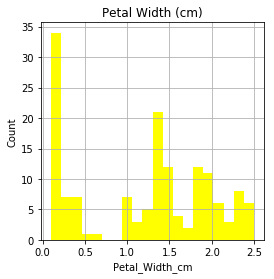

In [12]:
#Plotting graph using 'Petal Width' column
plt.figure(figsize = (4,4)) 
x = data['Petal Width'] 
  
plt.hist(x, bins = 20, color = "yellow") 
plt.title("Petal Width (cm)") 
plt.xlabel("Petal_Width_cm") 
plt.ylabel("Count") 
plt.grid() 
plt.show()

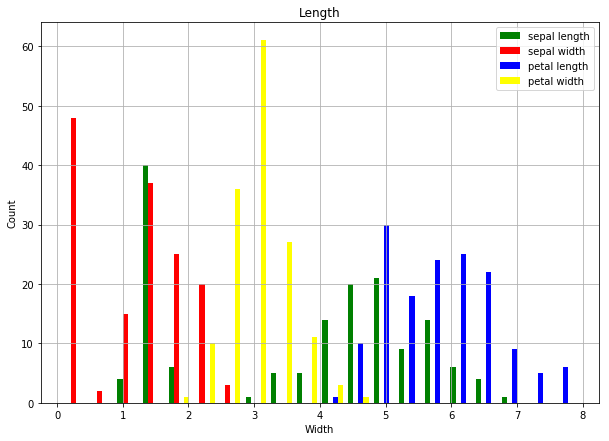

In [13]:
#Now we are combining all the graphs into one single graph
plt.figure(figsize = (10, 7)) 
x = data['Petal Length'] 
y = data['Petal Width']
z = data['Sepal Length']
a = data['Sepal Width']

colors=['green','red','blue','yellow']
plt.hist([x,y,z,a],bins = 20, color = colors, label = ['sepal length','sepal width', 'petal length', 'petal width'])

#Providing legend to identify the column name on basis of their color
plt.legend(loc='upper right')
plt.title("Length") 
plt.xlabel("Width") 
plt.ylabel("Count") 
plt.grid()
plt.show()

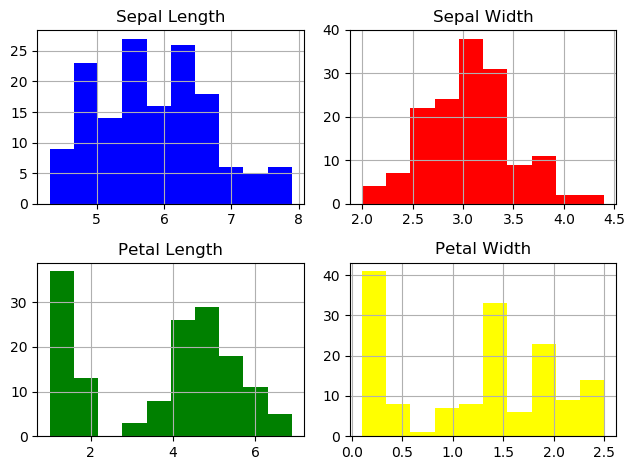

<Figure size 400x400 with 0 Axes>

In [76]:
# To print all 4 graphs in a single cell

plt.rcdefaults() #This function reset the predefined graphical values for displaying a graph
fig, plots = plt.subplots(nrows = 2, ncols = 2)
plt0,plt1,plt2,plt3 = plots.flatten()

#Defining each graph
plt0.hist(data['Sepal Length'],bins=10, label = ['Sepal Length'], color = 'blue')
plt0.grid(linestyle = 'solid')
plt0.set_title("Sepal Length")

plt1.hist(data['Sepal Width'],bins=10, label = ['Sepal Width'], color = 'red')
plt1.grid(linestyle = 'solid')
plt1.set_title("Sepal Width")

plt2.hist(data['Petal Length'],bins=10, label= ['Petal Length'], color = 'green')
plt2.grid(linestyle = 'solid')
plt2.set_title("Petal Length")

plt3.hist(data['Petal Width'],bins=10, label = ['Petal Width'], color = 'yellow')
plt3.grid(linestyle = 'solid')
plt3.set_title("Petal Width")

#Defining the figure size
plt.figure(figsize = (4, 4))

fig.tight_layout()
#Note:- fig.tight_layout() is used to avoid overlapping 

plt.show()

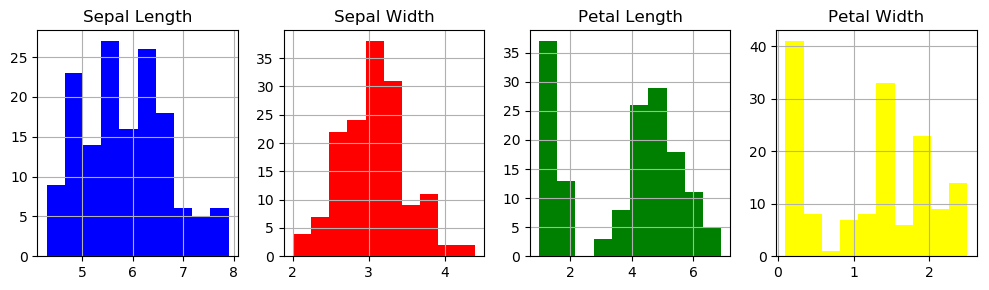

<Figure size 400x400 with 0 Axes>

In [78]:
# Displaying all 4 graphs in a single row
fig, plots = plt.subplots(nrows = 1, ncols = 4, figsize = (10,3))
plt0,plt1,plt2,plt3 = plots.flatten()

#Defining each graph
plt0.hist(data['Sepal Length'],bins=10, label = ['Sepal Length'], color = 'blue')
plt0.grid(linestyle = 'solid')
plt0.set_title("Sepal Length")

plt1.hist(data['Sepal Width'],bins=10, label = ['Sepal Width'], color = 'red')
plt1.grid(linestyle = 'solid')
plt1.set_title("Sepal Width")

plt2.hist(data['Petal Length'],bins=10, label= ['Petal Length'], color = 'green')
plt2.grid(linestyle = 'solid')
plt2.set_title("Petal Length")

plt3.hist(data['Petal Width'],bins=10, label = ['Petal Width'], color = 'yellow')
plt3.grid(linestyle = 'solid')
plt3.set_title("Petal Width")

#Defining  figure size
plt.figure(figsize = (4, 4))

fig.tight_layout()
#Note:- fig.tight_layout() is used to avoid overlapping 

plt.show()

# Complete Plots in One View

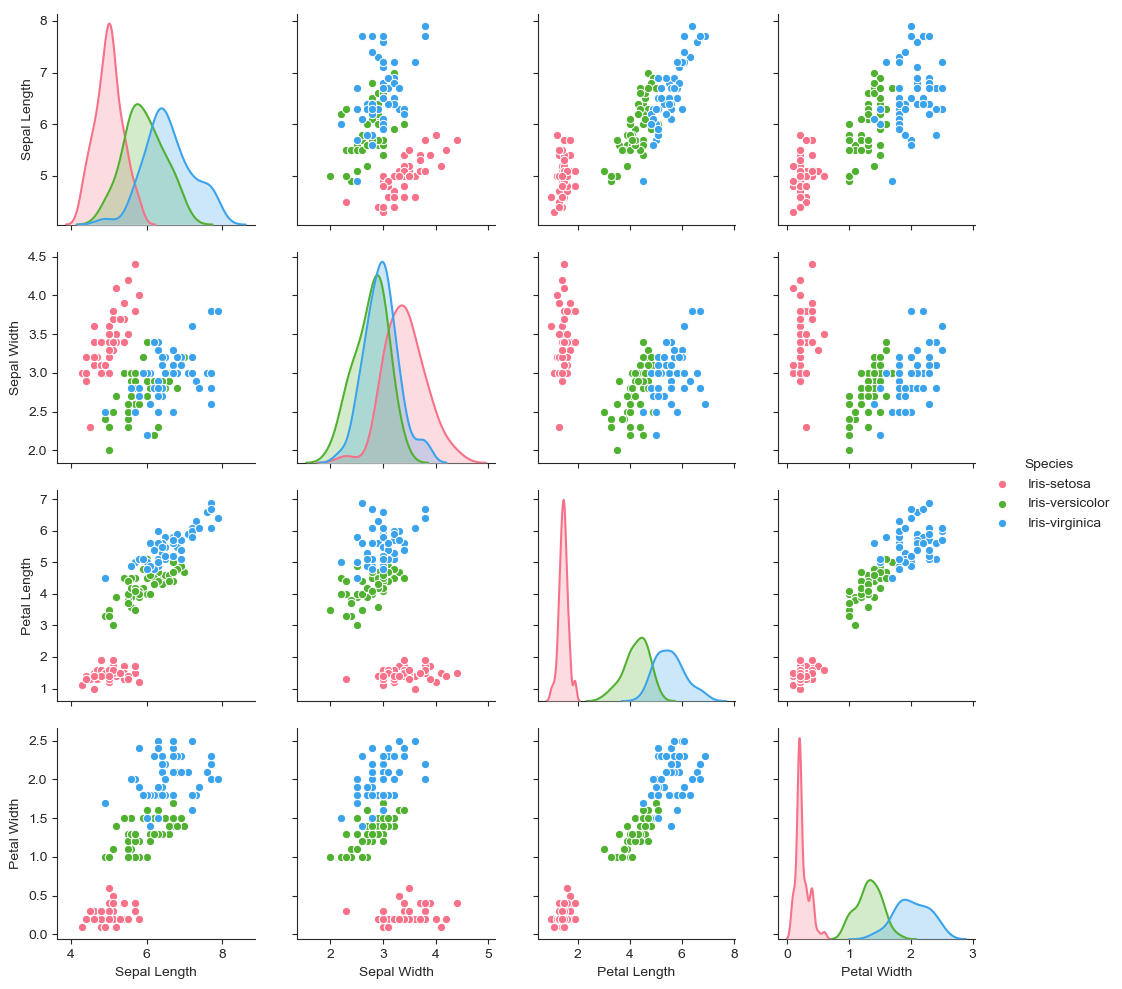

In [111]:
#Displaying pairplot using Seaborn
sns.set_style("ticks")
sns.pairplot(data,hue = 'Species',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

# Violin Plot 

Violin Plot is a method to visualize the distribution of numerical data of different variables.
It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis.

Here, violin plot is used to understand the distribution and density of each species on basis of labels.

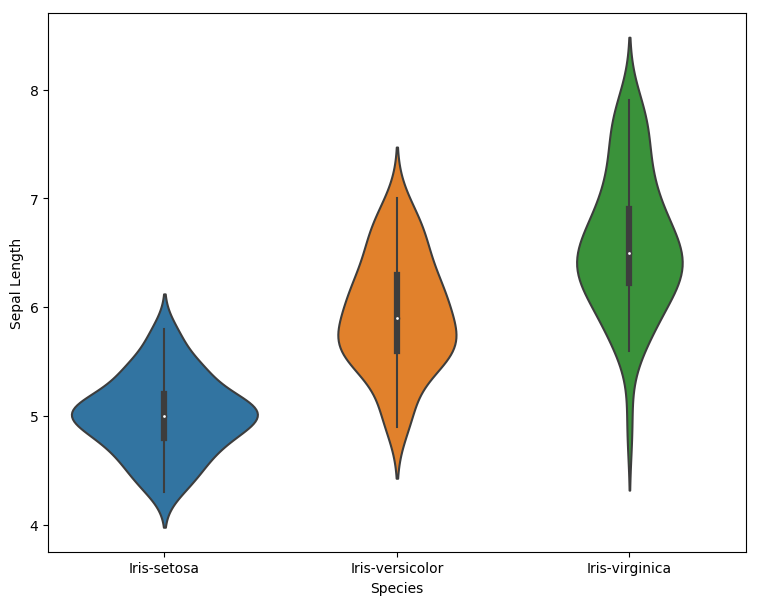

In [83]:
#Plotting on the basis of 'Sepal Length'

fig, ax = plt.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax, x = data["Species"],  
                  y = data["Sepal Length"] )

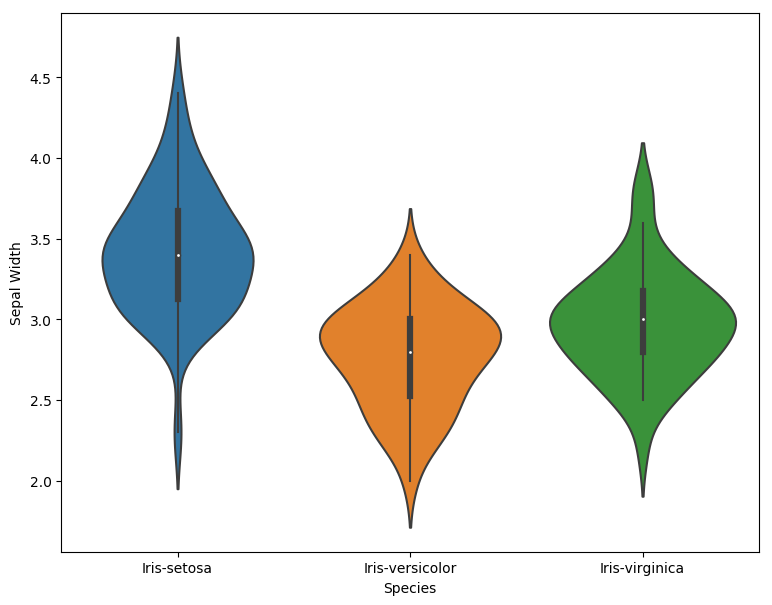

In [84]:
#Plotting on the basis of 'Sepal Width'

fig, ax = plt.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax, x = data["Species"],  
                  y = data["Sepal Width"] )

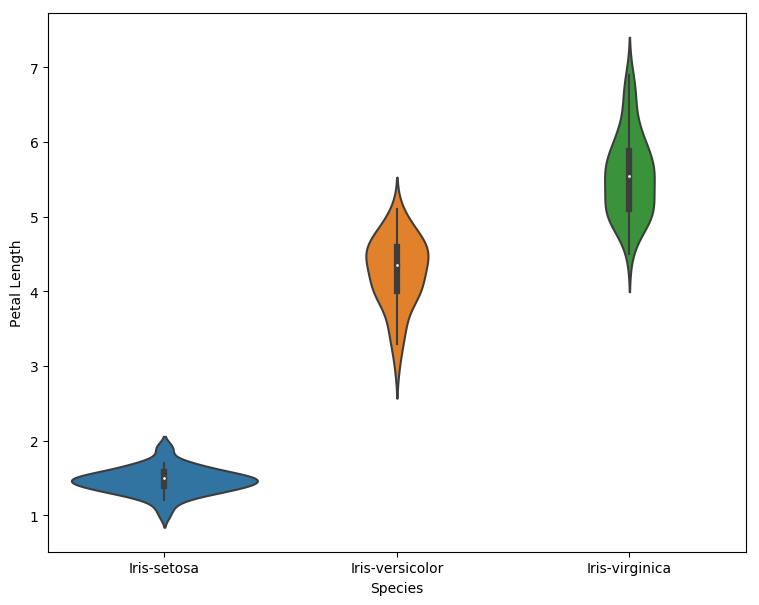

In [87]:
#Plotting on the basis of 'Petal Length'

fig, ax = plt.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax, x = data["Species"],  
                  y = data["Petal Length"] )

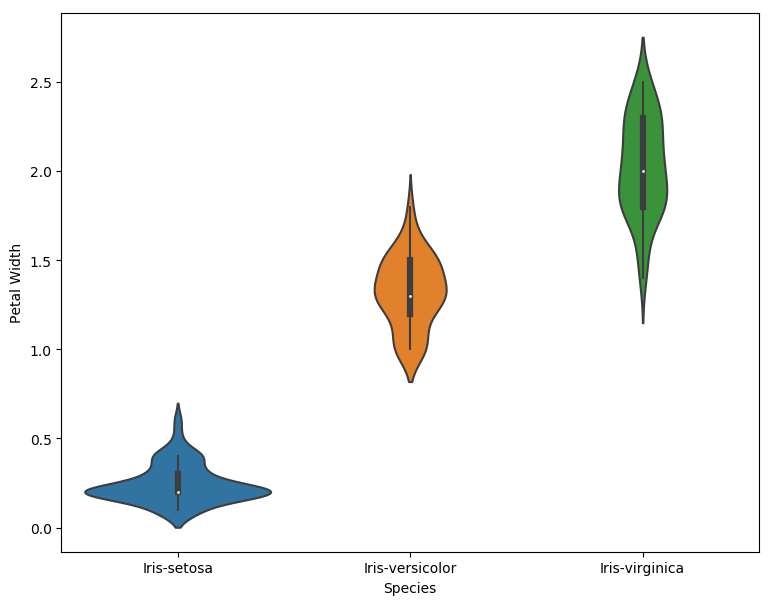

In [88]:
#Plotting on the basis of 'Petal Width'

fig, ax = plt.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax, x = data["Species"],  
                  y = data["Petal Width"] )

# Classification

The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups. Such as, Yes or No, 0 or 1, Spam or Not Spam, cat or dog, etc. Classes can be called as targets/labels or categories.

# For IRIS dataset we will use 2 classification algorithms i.e:-
    1. KNN
    2. Random Forest

# Step 1:- Defining data and label

In [107]:

X = data.iloc[:, 1:4]
y = data.iloc[:, 4]


# Step 2:- Splitting the data

In [99]:
#Split data into training and test datasets (training will be based on 70% of data)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
#test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


# Step 3:- Scaling the data

In [102]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#X_train_std and X_test_std are the scaled datasets to be used in algorithms

# Step 4:- Applying algorithm 

# K Nearest Neighbors(KNN)

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).
A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor.

Here, KNN is used as it is non-parametric, lazy learning algorithm.
It means that it does not make any assumptions on the underlying data distribution.

In [104]:
#Applying Knn

knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('The accuracy of the Knn classifier on training data is {:.2f}'.format(knn.score(X_train_std, y_train)))
print('The accuracy of the Knn classifier on test data is {:.2f}'.format(knn.score(X_test_std, y_test)))

The accuracy of the Knn classifier on training data is 0.96
The accuracy of the Knn classifier on test data is 0.98


# Random Forest

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

We are using random forest because it increases predictive power of the algorithm and also helps prevent overfitting.

In [106]:
#Applying RandomForest
#Create Random Forest object
random_forest = RandomForestClassifier()

#Train model
random_forest.fit(X_train_std, y_train)

#Print performance
print('The accuracy of the Random Forest classifier on training data is {:.2f}'.format(random_forest.score(X_train_std, y_train)))
print('The accuracy of the Random Forest classifier on test data is {:.2f}'.format(random_forest.score(X_test_std, y_test)))

F:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of the Random Forest classifier on training data is 0.99
The accuracy of the Random Forest classifier on test data is 0.96


# Prediction

Now we will make a prediction model using Logistic Regression and try to predict what is the species on the basis of user defined values of labels

In [114]:
lr = LogisticRegression(solver='newton-cg')

Note:- newton-cg is used as solver because it support only L2 regularization with primal formulation, or no regularization.
Other type of solvers:-  sag, lbfgs and liblinear.

Fitting the model

In [116]:
lr.fit(X,y)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

Now Predict with user defined values

In [118]:
lr.predict([[3.7,4.1,2.9]])

array(['Iris-virginica'], dtype=object)